# Analysis of fake news sites and viral posts, 2016 vs. 2017

In [1]:
import pandas as pd
import calendar
from datetime import datetime
%matplotlib inline

## Comparing lists of sites from 2016 vs. 2017

### Load 2017 list

In [2]:
sites_2017 = pd.read_csv("../data/sites_2017.csv")
    
sites_2017.head()

,domain,network
0,12minutos.com,React365
1,20minutenews.com,Celebtricity
2,24aktuelles.com,React365
3,24x365live.com,NaN
4,abcnews-us.com,Batty


In [3]:
len(sites_2017)

167

Subdomained sites:

In [4]:
sites_2017[
    sites_2017["domain"].str.count(r"\.") > 1
]

,domain,network
5,abcnews.com.co,NaN
48,cnn.com.de,NaN
83,nachrichten.de.com,React365


No sites show up twice:

In [5]:
sites_2017["domain"].value_counts().max()

1

### Load 2016 list

In [6]:
sites_2016 = pd.read_csv("../data/sites_2016.csv")

sites_2016.head()

,domain
0,abcnews.com.co
1,adobochronicles.com
2,alynews.com
3,associatedmediacoverage.com
4,baldwinpost.com


In [7]:
len(sites_2016)

96

Subdomained sites:

In [8]:
sites_2016[
    sites_2016["domain"].str.count(r"\.") > 1
]

,domain
0,abcnews.com.co


No sites show up twice:

In [9]:
sites_2016["domain"].value_counts().max()

1

### Sites in 2017 but not 2016

In [10]:
len(set(sites_2017["domain"]) - set(sites_2016["domain"]))

119

### Sites in 2016 but not 2017

In [11]:
len(set(sites_2016["domain"]) - set(sites_2017["domain"]))

48

In [12]:
# Percentage of 2016 list that are not in 2017 list:
100 * len(set(sites_2016["domain"]) - set(sites_2017["domain"]))  / len(set(sites_2016["domain"]))

50.0

### Sites in both lists

In [13]:
len(set(sites_2016["domain"]).intersection(set(sites_2017["domain"])))

48

## Top domains in 2017's top 50 posts

In [14]:
# get the top 50 list:
top_2017 = pd.read_csv("../data/top_2017.csv")

top_2017.head()

,title,url,domain,fb_engagements,published_date,category
0,Babysitter transported to hospital after inser...,http://worldnewsdailyreport.com/babysitter-tra...,worldnewsdailyreport.com,1204400,2017-05-03,Medical
1,"FBI seizes over 3,000 penises during raid at m...",http://worldnewsdailyreport.com/fbi-seizes-ove...,worldnewsdailyreport.com,1145470,2017-09-25,Crime
2,"Charles Manson to be released on parole, to Jo...",http://www.breakingnews365.net/59690fb994b9c/c...,breakingnews365.net,1125031,2017-07-14,Crime
3,Police: Chester Bennington Was Murdered,http://yournewswire.com/chester-bennington-mur...,yournewswire.com,1042032,2017-07-21,Crime
4,Morgue employee cremated by mistake while taki...,https://worldnewsdailyreport.com/morgue-employ...,worldnewsdailyreport.com,993205,2017-03-01,Crime


In [15]:
top_2017_domains = top_2017["domain"].value_counts()\
    .to_frame("count")

top_2017_domains[
    top_2017_domains["count"] > 1
]

,count
worldnewsdailyreport.com,12
yournewswire.com,9
channel45news.com,2
breakingnews365.net,2
breakingnews247.net,2
viralactions.com,2
12minutos.com,2


## What happened to the top 2016 publishers in 2017?

First let's figure out who the top publishers were:

In [16]:
top_2016 = pd.read_csv('../data/top_2016.csv')

top_2016.head()

,title,url,domain,month,fb_engagements,category
0,"""Obama Signs Executive Order Banning The Pledg...",http://abcnews.com.co/obama-executive-order-ba...,abcnews.com.co,October,2176777,Politics
1,"""Woman arrested for defecating on boss’ desk a...",https://thevalleyreport.com/2016/04/25/woman-a...,thevalleyreport.com,April,1765146,Crime
2,"""Pope Francis Shocks World, Endorses Donald Tr...",Ending The Fed (removed),ending the fed (removed),October,961000,Politics
3,"""Trump Offering Free One-Way Tickets to Africa...",http://tmzhiphop.com/trump-offering-free-one-w...,tmzhiphop.com,November,801741,Politics
4,"""Cinnamon Roll Can Explodes Inside Man’s Butt ...",https://empireherald.com/cinnamon-roll-can-exp...,empireherald.com,April,764814,Crime


URLs for three posts are no longer available:

In [17]:
top_2016[
    top_2016["domain"].str.count(r"\.") == 0
]

,title,url,domain,month,fb_engagements,category
2,"""Pope Francis Shocks World, Endorses Donald Tr...",Ending The Fed (removed),ending the fed (removed),October,961000,Politics
6,"""FBI Agent Suspected in Hillary Email Leaks Fo...",Denver Guardian (removed),denver guardian (removed),November,567000,Politics
37,BREAKING Romanian Hacker With Access To Clinto...,Christian Times (removed),christian times (removed),July,242500,Politics


In [18]:
top_2016_domains = top_2016["domain"].value_counts()\
    .to_frame("count")

top_2016_domains[
    top_2016_domains["count"] > 1
]

,count
tmzhiphop.com,7
abcnews.com.co,6
worldnewsdailyreport.com,5
thevalleyreport.com,4
empireherald.com,3
burrardstreetjournal.com,2
celebtricity.com,2
dailyfinesser.com,2
satiratribune.com,2
heaviermetal.net,2


In [19]:
len(top_2016_domains)

24

In [20]:
top_domains_comparison = pd.merge(
    top_2016_domains,
    top_2017_domains,
    how="outer",
    left_index=True,
    right_index=True,
    suffixes=["_2016", "_2017"]
).fillna(0).astype(int)

top_domains_comparison.sort_values("count_2016", ascending=False)

,count_2016,count_2017
tmzhiphop.com,7,0
abcnews.com.co,6,0
worldnewsdailyreport.com,5,12
thevalleyreport.com,4,0
empireherald.com,3,0
burrardstreetjournal.com,2,1
dailyfinesser.com,2,0
thelastlineofdefense.org,2,1
satiratribune.com,2,0
celebtricity.com,2,1


Write to file

In [21]:
top_domains_comparison.sort_values("count_2016", ascending=False)\
    .to_csv("../output/top_domains_comparison.csv")

# What types of stories did well in 2017?

In [22]:
top_cats_2017 = top_2017['category'].fillna("other").value_counts().to_frame("count")
top_cats_2017

,count
Crime,20
Politics,11
World,4
Medical,4
Business,3
Race,2
Breaking News,2
Religion,1
Local News,1
Music,1


Politics and crime dominate the categories. What percentage do they make up of the whole?

In [23]:
# politics
top_cats_2017['count']['Politics'] / len(top_2017) * 100


22.0

In [24]:
# crime
top_cats_2017['count']['Crime'] / len(top_2017) * 100

40.0

How does this compare to 2016?

In [25]:
top_cats_2016 = top_2016['category']\
    .value_counts()\
    .to_frame("count")
    
top_cats_2016

,count
Politics,23
Crime,16
World,3
Science,2
Race,2
Religion,1
Sexuality,1
Animals,1
Music,1


Calculate percentages:

In [26]:
# politics
top_cats_2016['count']['Politics'] / len(top_2016) * 100

46.0

In [27]:
# crime
top_cats_2016['count']['Crime'] / len(top_2016) * 100

32.0

In [28]:
# world
top_cats_2016['count']['World'] / len(top_2016) * 100

6.0

# How do the top debunking stories compare to the top fake news stories?

Get top fifty debunking stories

In [29]:
debunk_2017 = pd.read_csv("../data/fact_check.csv")

In [30]:
debunk_2017.columns

Index(['title', 'url', 'Politifact', 'Politifact FB', 'Snopes', 'Snopes FB',
       'Factcheck', 'Factcheck FB', 'ABC', 'ABC FB'],
      dtype='object')

How many of the top 50 shares could we locate fact checking articles for?

In [31]:
one_or_more_checked = debunk_2017[
    ~pd.isna(debunk_2017['Politifact']) | 
    ~pd.isna(debunk_2017['Snopes']) | 
    ~pd.isna(debunk_2017['ABC']) | 
    ~pd.isna(debunk_2017['Factcheck'] )
]

len(one_or_more_checked)

31

What is the total engagement for all fact checking articles in the top 50?

In [32]:
debunk_2017.columns

Index(['title', 'url', 'Politifact', 'Politifact FB', 'Snopes', 'Snopes FB',
       'Factcheck', 'Factcheck FB', 'ABC', 'ABC FB'],
      dtype='object')

In [33]:
debunk_shares = \
    debunk_2017['Politifact FB'].sum() + \
    debunk_2017['Snopes FB'].sum() + \
    debunk_2017['Factcheck FB'].sum() + \
    debunk_2017['ABC FB'].sum()

debunk_shares

127543.0

What is the total engagement for all in the top 50?

In [34]:
top_2017.columns

Index(['title', 'url', 'domain', 'fb_engagements', 'published_date',
       'category'],
      dtype='object')

In [35]:
top_2017_shares = top_2017['fb_engagements'].sum()
top_2017_shares

23498652

What's the percent difference?

In [36]:
debunk_shares/top_2017_shares * 100

0.54276730426919806

# Which months saw more top posts in 2017?

Convert the date column to `datetime` and re-index

In [37]:
top_2017['published_date'] = pd.to_datetime( top_2017['published_date'] )
# re-index by date
top_2017.index = top_2017['published_date']

Group by month and convert the integer month to a named month

In [38]:
top_2017_bymonth = top_2017.groupby(pd.Grouper(freq='M')) \
     .count()
    
top_2017_bymonth.index = top_2017_bymonth.index.map( lambda x: calendar.month_name[x.month] )

top_2017_bymonth['title'].to_frame()
    

,title
published_date,
January,8
February,3
March,3
April,4
May,9
June,3
July,5
August,2
September,6


** First six months vs. 2017 vs last six months **

In [39]:
# first half of 2017
top_2017_bymonth.iloc[0:6, 0].sum()

30

In [40]:
# second half of 2017
top_2017_bymonth.iloc[6:, 0].sum()

20

Plot the distribution of posts by month

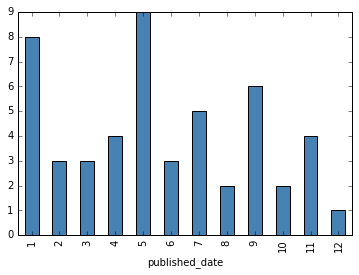

In [41]:
top_2017.groupby(
    top_2017.index.month
).count()['title'].plot(kind="bar", color="steelblue")

# Which months saw more top posts in 2016?

Add an index where the month string is converted to a datetime

In [42]:
def fix_date(x):
    m = x['month']
    d = datetime.strptime(m, "%B").replace(year=2016)
    
    return d

top_2016.index = top_2016.apply( fix_date , axis=1)

Group by month and count the titles. Order is preserved because of datetime. Now convert back to month name for readability.

In [43]:
top_2016_bymonth = top_2016.groupby(pd.Grouper(freq="M")) \
    .count()['title'] \
    .to_frame()
    
top_2016_bymonth.index = top_2016_bymonth.index.map( 
    lambda x: calendar.month_name[x.month] 
)

top_2016_bymonth

,title
January,2
February,4
March,7
April,5
May,3
June,0
July,9
August,1
September,3
October,11


In [44]:
top_2016_bymonth.to_clipboard()

Compare first six months to last six months:

In [45]:
# first half of 2016
top_2016_bymonth.iloc[0:6, 0].sum()

21

In [46]:
# last half of 2016
top_2016_bymonth.iloc[6:, 0].sum()

29

Plot by month

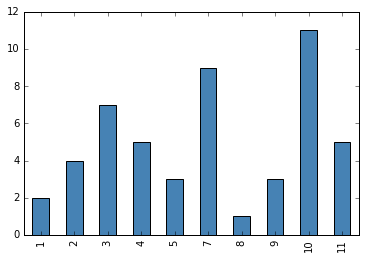

In [47]:
top_2016.groupby(
    top_2016.index.month
) \
.count()['title'] \
.plot(kind="bar", color="steelblue")

---

---

---